**Pauta L2**

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Misión 1

In [5]:
df_datos = pd.read_csv("data.csv")
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24580 entries, 0 to 24579
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   league               24580 non-null  object 
 1   season               24580 non-null  int64  
 2   date                 24580 non-null  object 
 3   team                 24580 non-null  object 
 4   h_a                  24580 non-null  object 
 5   result               24580 non-null  object 
 6   pts                  24580 non-null  int64  
 7   goals_scored         24580 non-null  int64  
 8   goals_missed         24580 non-null  int64  
 9   deep_passes          24580 non-null  int64  
 10  deep_passes_allowed  24580 non-null  int64  
 11  ppda                 24580 non-null  float64
 12  oppda                24580 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 2.4+ MB


In [6]:
df_datos.describe()

,season,pts,goals_scored,goals_missed,deep_passes,deep_passes_allowed,ppda,oppda
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.373841,1.341009,1.341009,5.806957,5.806957,10.904386,10.904386
std,1.699285,1.315111,1.244176,1.244176,4.048151,4.048151,6.163586,6.163586
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,3.000000,3.000000,6.962963,6.962963
50%,2016.000000,1.000000,1.000000,1.000000,5.000000,5.000000,9.500000,9.500000
75%,2018.000000,3.000000,2.000000,2.000000,8.000000,8.000000,13.095622,13.095622
max,2019.000000,3.000000,10.000000,10.000000,42.000000,42.000000,152.000000,152.000000


In [7]:
df_datos.apply(lambda x: sum(x.isnull()),axis=0)

league                 0
season                 0
date                   0
team                   0
h_a                    0
result                 0
pts                    0
goals_scored           0
goals_missed           0
deep_passes            0
deep_passes_allowed    0
ppda                   0
oppda                  0
dtype: int64

In [31]:
df_datos.head()
df_datos.loc[df_datos['date'] == "2014-08-22 19:30:00"]


,league,season,date,team,h_a,result,pts,goals_scored,goals_missed,deep_passes,deep_passes_allowed,ppda,oppda
0,Bundesliga,2014,2014-08-22 19:30:00,Bayern Munich,h,w,3,2,1,5,4,9.625000,21.850000
408,Bundesliga,2014,2014-08-22 19:30:00,Wolfsburg,a,l,0,1,2,4,5,21.850000,9.625000
12832,Ligue_1,2014,2014-08-22 19:30:00,Paris Saint Germain,a,d,1,0,0,6,3,9.083333,21.000000
13478,Ligue_1,2014,2014-08-22 19:30:00,Evian Thonon Gaillard,h,d,1,0,0,3,6,21.000000,9.083333


Misión 2

In [9]:
df_tabla = df_datos.groupby(['league', 'season', "team"]).agg({'pts': ['sum'], 'goals_scored':['sum'], 'goals_missed':['sum'],  'deep_passes':['mean'],  'deep_passes_allowed':['mean'],'ppda': ['mean'], 'oppda': ['mean']})
df_tabla.columns = ['pts', 'goals_scored', 'goals_missed', 'deep_passes_avg', 'deep_passes_allowed_avg', 'ppda_avg','oppda_avg']
df_tabla = df_tabla.reset_index()
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg
0,Bundesliga,2014,Augsburg,49,43,43,3.941176,6.500000,7.625900,10.402360
1,Bundesliga,2014,Bayer Leverkusen,61,62,37,7.235294,3.176471,5.693289,7.347595
2,Bundesliga,2014,Bayern Munich,79,80,18,11.411765,2.441176,5.761476,25.022717
3,Bundesliga,2014,Borussia Dortmund,46,47,42,8.588235,3.294118,7.622450,12.655974
4,Bundesliga,2014,Borussia M.Gladbach,66,53,26,6.500000,5.823529,12.751108,12.783803


In [10]:
df_tabla= df_tabla.sort_values(by = ['season', 'league', 'pts'], ascending = False)
df_tabla= df_tabla.reset_index(drop=True)

In [11]:
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294


In [12]:
df_tabla_wdl= df_datos.groupby(['league', 'season', "team", 'result']).size().to_frame('result_real').reset_index()
# Se paramos en tablas de derrota, empate y victoria

df_tabla_l= df_tabla_wdl.loc[df_tabla_wdl['result'] == 'l']
df_tabla_w= df_tabla_wdl.loc[df_tabla_wdl['result'] =='w']
df_tabla_d= df_tabla_wdl.loc[df_tabla_wdl['result'] == 'd']

In [13]:
# Agregasmos las victorias
df_tabla= df_tabla.merge(df_tabla_w, how='inner', on=['league', 'season', 'team'])
df_tabla.pop("result")
df_tabla= df_tabla.rename(columns={"result_real":"wins"})
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,wins
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712,26
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413,24
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980,23
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134,24
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294,21


In [14]:
df_tabla= df_tabla.merge(df_tabla_l, how='inner', on=['league', 'season', 'team'])
df_tabla.pop("result")
df_tabla= df_tabla.rename(columns={"result_real":"defeats"})
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,wins,defeats
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712,26,7
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413,24,4
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980,23,6
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134,24,8
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294,21,10


In [15]:
df_tabla= df_tabla.merge(df_tabla_d, how='inner', on=['league', 'season', 'team'])
df_tabla.pop("result")
df_tabla= df_tabla.rename(columns={"result_real":"draws"})
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,wins,defeats,draws
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712,26,7,5
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413,24,4,10
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980,23,6,9
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134,24,8,6
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294,21,10,7


In [16]:
df_tabla['matches'] = df_tabla[['wins', 'defeats', 'draws']].sum(axis=1)
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,wins,defeats,draws,matches
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712,26,7,5,38
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413,24,4,10,38
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980,23,6,9,38
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134,24,8,6,38
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294,21,10,7,38


In [17]:
df_tabla['position'] = df_tabla.groupby(['league', 'season']).cumcount()
df_tabla['position'] = df_tabla['position'] + 1
df_tabla.head()

,league,season,team,pts,goals_scored,goals_missed,deep_passes_avg,deep_passes_allowed_avg,ppda_avg,oppda_avg,wins,defeats,draws,matches,position
0,Serie_A,2019,Juventus,83,76,43,7.105263,4.578947,9.041600,15.611712,26,7,5,38,1
1,Serie_A,2019,Inter,82,81,36,8.605263,5.052632,9.199278,16.556413,24,4,10,38,2
2,Serie_A,2019,Atalanta,78,98,48,9.710526,3.789474,8.020852,13.795980,23,6,9,38,3
3,Serie_A,2019,Lazio,78,79,42,9.078947,6.052632,13.290807,13.495134,24,8,6,38,4
4,Serie_A,2019,Roma,70,77,51,8.710526,4.921053,11.654482,14.162294,21,10,7,38,5


Mision 3

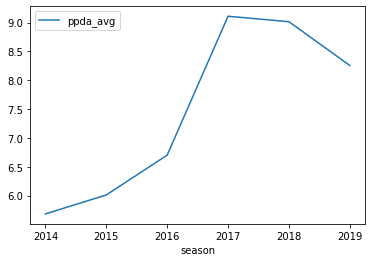

In [18]:
# En esta parte, se pueden usar distintos metodos para determinar un cambio de entrenador, mientras se justifique adecuadamente es correcta.
# En este caso se grafica buscamos temporadas en que hayan cambios notorios de ppda_avg, de más de 2 entre temporadas. 
# Luego se observa si hay relación con los pases en profundidad y los goles
# Si aumento el ppda_avg los pases en profundidad disminuyeron y la cantidad de goles tambien
# Podemos suponer que se hizo un cambio de dt, desde uno más ofensivo a uno que favorece posiciones defensivas
# En este caso, se muestra un ejemplo del cambio de Luis Enrique a Ernesto Valverde en el Barcelona.
# En la el Laboratorio se debe mostrar con 2 casos más. 

df_tabla_barcelona= df_tabla.loc[df_tabla['team'] == 'Barcelona']
df_tabla_barcelona.plot(x='season', y=["ppda_avg"])

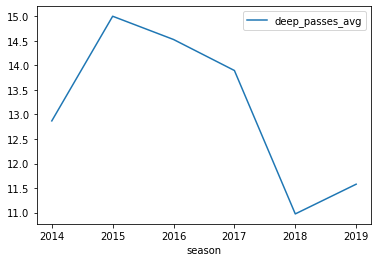

In [19]:
df_tabla_barcelona.plot(x='season', y=["deep_passes_avg"])

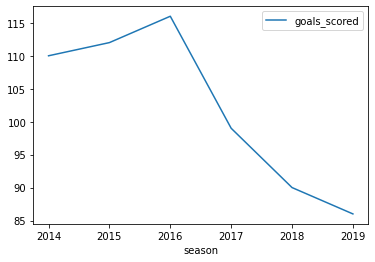

In [20]:
df_tabla_barcelona.plot(x='season', y=["goals_scored"])

Misión 4

In [32]:
# Creamos tablas con los partidos y sus contrincantes.
df_home= df_datos[[[""]].copy()
df_away= df_datos.copy()

In [33]:
df_home= df_home.loc[df_home['h_a'] == 'h']
df_away= df_home.loc[df_home['h_a'] == 'a']

In [ ]:
df_matches= df_home.merge(df_away, how='inner', on=['league', 'season', 'team'])

In [21]:
from sklearn.preprocessing import LabelEncoder

variables = ['h_a', 'island', 'sex']
label_encoder = LabelEncoder()
for i in pinguinos_variables:
    df_pinguinos_not_null[i] = label_encoder.fit_transform(df_pinguinos_not_null[i])
df_pinguinos_not_null.head()

NameError: ignored